In [1]:
import GPy
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
import numpy as np

In [3]:
true_kernel_lengthscale = 2.0
true_kernel_variance = 1.0
true_noise = 0.5

In [4]:
kernel = GPy.kern.RBF(
    input_dim=1, variance=true_kernel_variance, lengthscale=true_kernel_lengthscale
)

In [5]:
kernel

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,2.0,+ve,


In [6]:
X = np.linspace(-4.0, 4.0, 250)[:, None]

In [7]:
C = kernel.K(X, X)

In [8]:
np.random.seed(0)
f = np.random.multivariate_normal(np.zeros_like(X.flatten()), C)
noise = np.random.normal(loc=0, scale=true_noise, size=f.flatten().size) 

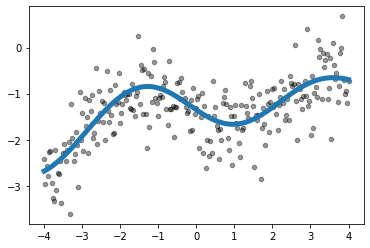

In [9]:
plt.plot(X, f, lw=5)
plt.scatter(X, f + noise, s=20, alpha=0.4, c="k")

In [10]:
k = GPy.kern.RBF(input_dim=1)
m = GPy.models.GPRegression(X, (f + noise).reshape(-1, 1), k)

{'dataplot': [<matplotlib.collections.PathCollection at 0x1261f6d60>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1262092b0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1261e8d30>]}

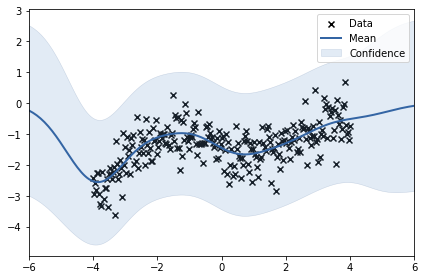

In [11]:
m.plot()

In [12]:
_ = m.optimize_restarts()

Optimization restart 1/10, f = 195.84754738377032
Optimization restart 2/10, f = 195.84754738420352
Optimization restart 3/10, f = 195.84754738488476
Optimization restart 4/10, f = 195.84754738373357
Optimization restart 5/10, f = 195.84754738844853
Optimization restart 6/10, f = 195.84754738371487
Optimization restart 7/10, f = 195.847547383823
Optimization restart 8/10, f = 195.84754738461945
Optimization restart 9/10, f = 195.84754738372928
Optimization restart 10/10, f = 195.84754738422166


In [13]:
m

GP_regression.,value,constraints,priors
rbf.variance,3.173279047762375,+ve,
rbf.lengthscale,2.3422120232188184,+ve,
Gaussian_noise.variance,0.25032019995651095,+ve,


In [14]:
k = GPy.kern.RBF(
    input_dim=1, variance=true_kernel_variance, lengthscale=true_kernel_lengthscale
)
m = GPy.models.GPRegression(X, (f + noise).reshape(-1, 1), k)

In [15]:
m.optimize_restarts()

Optimization restart 1/10, f = 195.8475473936342
Optimization restart 2/10, f = 195.84754738474803
Optimization restart 3/10, f = 195.84754754618757
Optimization restart 4/10, f = 195.84754738374266
Optimization restart 5/10, f = 195.84754738772745
Optimization restart 6/10, f = 195.84754738398067
Optimization restart 7/10, f = 195.84754738390444
Optimization restart 8/10, f = 195.84754738371876
Optimization restart 9/10, f = 195.8475473837782
Optimization restart 10/10, f = 195.8475473893405


In [16]:
m

GP_regression.,value,constraints,priors
rbf.variance,3.173275150587815,+ve,
rbf.lengthscale,2.342210766061685,+ve,
Gaussian_noise.variance,0.2503201961365106,+ve,


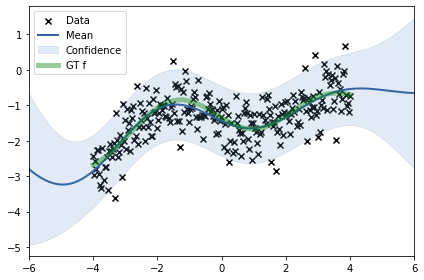

In [17]:
m.plot()
plt.plot(X, f, lw=5, label="GT f", alpha=0.4, color='green')
plt.legend()